In [1]:
#import the needed library
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = 'gdp_v2.00.nc'

# # option 1: open locally after download
# path = '/Users/selipot/Downloads/'
# ds = xr.open_dataset(path+file)

# option 2: open remotely without downloading
url_path = 'https://www.nodc.noaa.gov/archive/arc0199/0248584/1.1/data/0-data/'
ds = xr.open_dataset(url_path+file+'#mode=bytes')

In [3]:
traj_idx = np.insert(np.cumsum(ds.rowsize.values), 0, 0)

In [9]:
n = 4401825
# find the index for drifter ID 2578
j = int(np.where(ds.WMO==n)[0])
display('drifter index for ID '+str(n)+' is '+str(j))
dnew = ds.sst1[slice(traj_idx[j], traj_idx[j+1])]

'drifter index for ID 4401825 is 7700'

In [10]:
dnew

<xarray.DataArray 'sst1' (obs: 2322)>
array([275.524, 275.543, 275.562, ..., 270.469, 270.471, 270.479],
      dtype=float32)
Coordinates:
    longitude  (obs) float32 ...
    latitude   (obs) float32 ...
    time       (obs) datetime64[ns] ...
    ids        (obs) int64 ...
Dimensions without coordinates: obs
Attributes:
    long_name:  Fitted non-diurnal sea water temperature
    units:      Kelvin
    comments:   Estimated near-surface non-diurnal sea water temperature from...

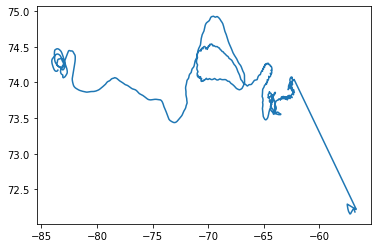

In [11]:
fig,ax = plt.subplots(1,1)

ax.plot(dnew.longitude, dnew.latitude)

In [17]:
import datetime
dnew2 = dnew.where(dnew.time<datetime.datetime(2019,12,31))

TypeError: '<' not supported between instances of 'int' and 'datetime.datetime'

In [28]:
dnew.time.values[2300]

numpy.datetime64('2020-01-06T11:00:00.000000000')

In [24]:
dnew

<xarray.DataArray 'sst1' (obs: 2322)>
array([275.524, 275.543, 275.562, ..., 270.469, 270.471, 270.479],
      dtype=float32)
Coordinates:
    longitude  (obs) float32 -83.52 -83.53 -83.54 -83.56 ... -56.84 -56.82 -56.8
    latitude   (obs) float32 74.17 74.17 74.17 74.16 ... 72.21 72.2 72.19 72.18
    time       (obs) datetime64[ns] 2019-09-02T11:00:00 ... 2020-01-07T08:00:00
    ids        (obs) int64 300234065713150 300234065713150 ... 300234065713150
Dimensions without coordinates: obs
Attributes:
    long_name:  Fitted non-diurnal sea water temperature
    units:      Kelvin
    comments:   Estimated near-surface non-diurnal sea water temperature from...